# Summary:

This notebook shows a search for multiple groups within the set of congressmembers, based on the voting data available in this dataset. I evaluated models with a range of cluster numbers to see if there were just 2 clusters of congressmembers, or if there was evidence of more clusters. More clusters would be evidence that caucuses within parties are important.

In [11]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

np.random.seed(42)

In [12]:
df = pd.read_csv('./data/labeled_data.csv')

In [13]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Cluster model with distance. -1 is 'no' vote, 0 is unknown/'?', 1 is 'yes' vote.
- These numbers were used to reflect that unknown votes are a middle ground between no and yes votes. So it is possible to think of no votes as being closer in distance to '?' votes than to 'yes' votes, and to translate this categorical data into a distance-based cluster model

### Create dataframe for this cluster model

In [14]:
# No target column for cluster models
df.drop(columns=['party'], inplace=True)

In [15]:
# Function to translate categorical data to distances
def cluster_map(x):
    if x == 'y':
        return 1
    elif x == '?':
        return 0
    elif x == 'n':
        return -1

In [16]:
# apply function to the whole dataframe
df = df.applymap(cluster_map)

In [17]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


### Elbow plot
- An "elbow plot" is of cluster number vs. inertia score. The inflection point, or 'elbow', is the best inertia score.
- Referred to: https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [18]:
# apparently "distortion" is another word for inertia score
# Create a list of inertia scores. Loop through number of clusters, fit Kmeans model, add inertia score to list.
# I am looking at inertia scores for cluster numbers between 2 and 10. I want to see how much better 2 is than
# other values
distortions = []
K = range(1, 11)
for k in K:
    Model = KMeans(n_clusters=k)
    Model.fit(df)
    distortions.append(Model.inertia_)

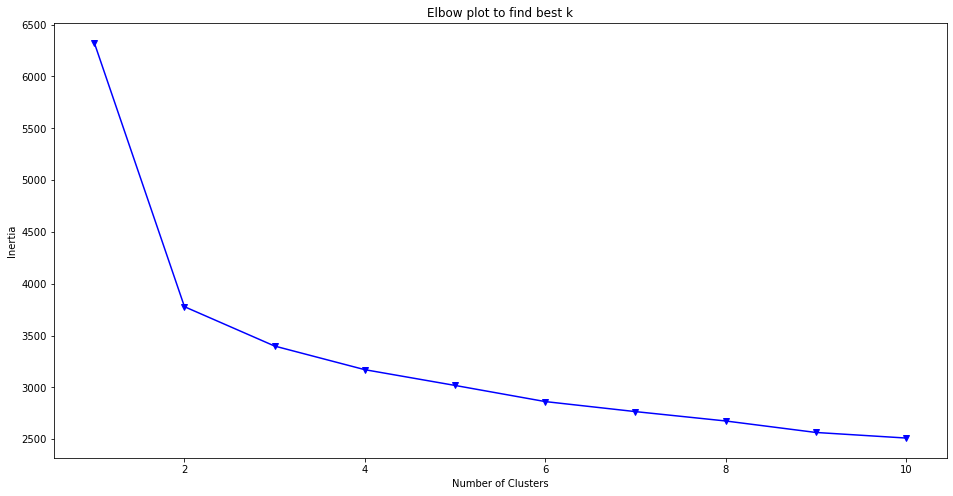

In [19]:
# Create elbow plot
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bv-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot to find best k')
plt.show()

**CONCLUSION**: The inflection point or elbow is at 2. The data is best divided into Republicans and Democrats, 2 clusters. There are no other significant groupings, because the inertia scores drop off steadily after 2 clusters.

### Silhouette scores

In [20]:
# Create a list of silhouette scores. Loop through number of clusters, fit Kmeans model, add score to list.
# Examining cluster numbers between 2 and 10. I want to see how much better 2 is than
# other values.
sil = []
K1 = range(2, 11)
for k in K1:
    Model = KMeans(n_clusters=k)
    Model.fit(df)
    sil.append(silhouette_score(df, Model.labels_, metric = 'euclidean'))

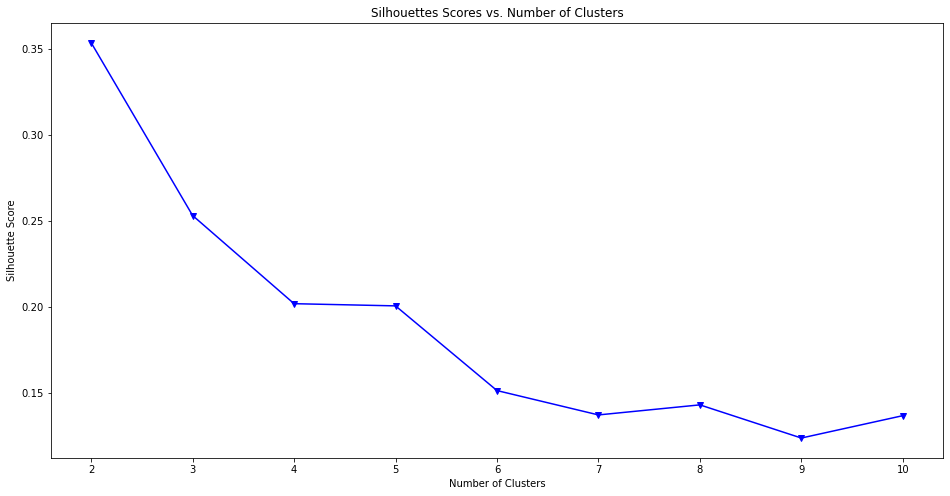

In [21]:
# Plot silhouette scores
plt.figure(figsize=(16,8))
plt.plot(K1, sil, 'bv-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouettes Scores vs. Number of Clusters')
plt.show()

**NOTE**: Maximum silhouette score is the goal. See this article:
https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html

**CONCLUSION**: The maximum silhouette score is at 2 clusters. The scores drop consistently with more clusters.